In [40]:
import random
import pandas as pd
import os

from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

from PIL import Image, ImageFilter


import keras.backend as KerasBackend


import time
import numpy
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Conv2DTranspose
from keras.layers.normalization import BatchNormalization
from keras.utils import to_categorical
from keras import backend as K
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import UpSampling2D
from keras.layers import ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
import keras
import cv2

import tensorflow as tf

import keras.utils as np_utils

In [2]:
#This is the Data to be Trained and Labeled.
X = []
y = []

X_images = []
y_images = []

#Data Paths
train_image_path = r"C:\Users\buckf\Documents\Practicum_2\Data\train\images"
train_mask_path = r"C:\Users\buckf\Documents\Practicum_2\Data\train\masks"


image_list = os.listdir(train_image_path)
mask_list = os.listdir(train_mask_path)

for image_num in range(len(image_list)):
    #Gets the Path to the Mask
    certain_image_path = os.path.join(train_image_path, image_list[image_num])
    image_img = Image.open(certain_image_path).convert('L')
    image_pix = np.array(image_img.getdata()).reshape(image_img.size[0], image_img.size[1], 1)
    X.append(image_pix)
    X_images.append(image_img)

for mask_num in range(len(mask_list)):
    #Gets the Path to the Mask
    certain_mask_path = os.path.join(train_mask_path, mask_list[mask_num])
    mask_img = Image.open(certain_mask_path).convert('L')
    mask_pix = np.array(mask_img.getdata()).reshape(mask_img.size[0], mask_img.size[1], 1)
    y.append(mask_pix)
    y_images.append(mask_img)
    
X = np.array(X, dtype = 'uint8')
y = np.array(y, dtype = 'uint8')


#Convert pixel values between 0 and 1. 
X = np.divide(X, 255)
y = np.divide(y, 255)

#Covert Datatype of Arrays for openCV and IoU functions.
X = X.astype('uint8')
y = y.astype('uint8')

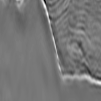

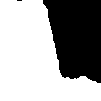

In [3]:
#This is how data looks. 
#The top is the what we need to seperate salt from sediment.
#The bottom is the mask or label we need to predict. 
display(X_images[10], y_images[10])

In [4]:
X.shape

(4000, 101, 101, 1)

In [5]:
X[10].shape

(101, 101, 1)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.5, shuffle = True)

c:\users\buckf\anaconda3\envs\tensorflow\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [7]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer
# hint: you need Flatten() before the first dense layer
    
    
    model = Sequential()
    model.add(Conv2D(1, kernel_size = (1,1), activation = 'relu', input_shape = (X_train.shape[1], X_train.shape[2], 1)))
    model.add(MaxPooling2D(pool_size=(1,1)))
    model.add(Dropout(0.25))
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
# build the model
model = simple_cnn_model()

# Fit the model

t0 = time.time()
log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
t1 = time.time()
print(t1-t0, " seconds")
# Final evaluation of the model
scores = model.evaluate(X_val, y_val, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 2000 samples, validate on 2000 samples
Epoch 1/20
2000/2000 [==============================] - 7s 4ms/step - loss: 0.2525 - acc: 0.7475 - val_loss: 0.2435 - val_acc: 0.7565
Epoch 2/20
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2525 - acc: 0.7475 - val_loss: 0.2435 - val_acc: 0.7565
Epoch 3/20
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2525 - acc: 0.7475 - val_loss: 0.2435 - val_acc: 0.7565
Epoch 4/20
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2525 - acc: 0.7475 - val_loss: 0.2435 - val_acc: 0.7565
Epoch 5/20
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2525 - acc: 0.7475 - val_loss: 0.2435 - val_acc: 0.7565
Epoch 6/20
2000/2000 [==============================] - 2s 928us/step - loss: 0.2525 - acc: 0.7475 - val_loss: 0.2435 - val_acc: 0.7565
Epoch 7/20
2000/2000 [==============================] - 2s 1ms/step - loss: 0.2525 - acc: 0.7475 - val_loss: 0.2435 - val_acc: 0.7565
Epoch 8/20
2

In [8]:
preds = model.predict(X_val)

In [9]:
pred = preds[10]

In [10]:
pred.dtype

dtype('float32')

In [11]:
#Array Data Needs to be uint8 to be displayed by openCV.
pred = pred.astype('uint8')

In [12]:
pred = np.multiply(pred, 255)
pred.max()

0

In [13]:
cv2.imshow('sample', pred)
cv2.waitKey(5000)

-1

In [14]:
cv2.destroyAllWindows()

In [15]:
K.clear_session()

In [16]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))

    model.add(Conv2D(32, kernel_size = (3,3),
                     padding = 'same',
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    
    model.add(Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(2,2)))
    
    
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
    
    
    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# # build the model
# model = simple_cnn_model()

# # Fit the model

# t0 = time.time()
# log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# t1 = time.time()
# print(t1-t0, " seconds")
# # Final evaluation of the model
# scores = model.evaluate(X_val, y_val, verbose=0)
# print("CNN Error: %.2f%%" % (100-scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 101, 101, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 101, 101, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 101, 101, 1)       289       
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 2000 samples
Epoch 1/20
2000/2000 [==============================] - 7s 3ms/step - loss: 0.2017 - acc: 0.

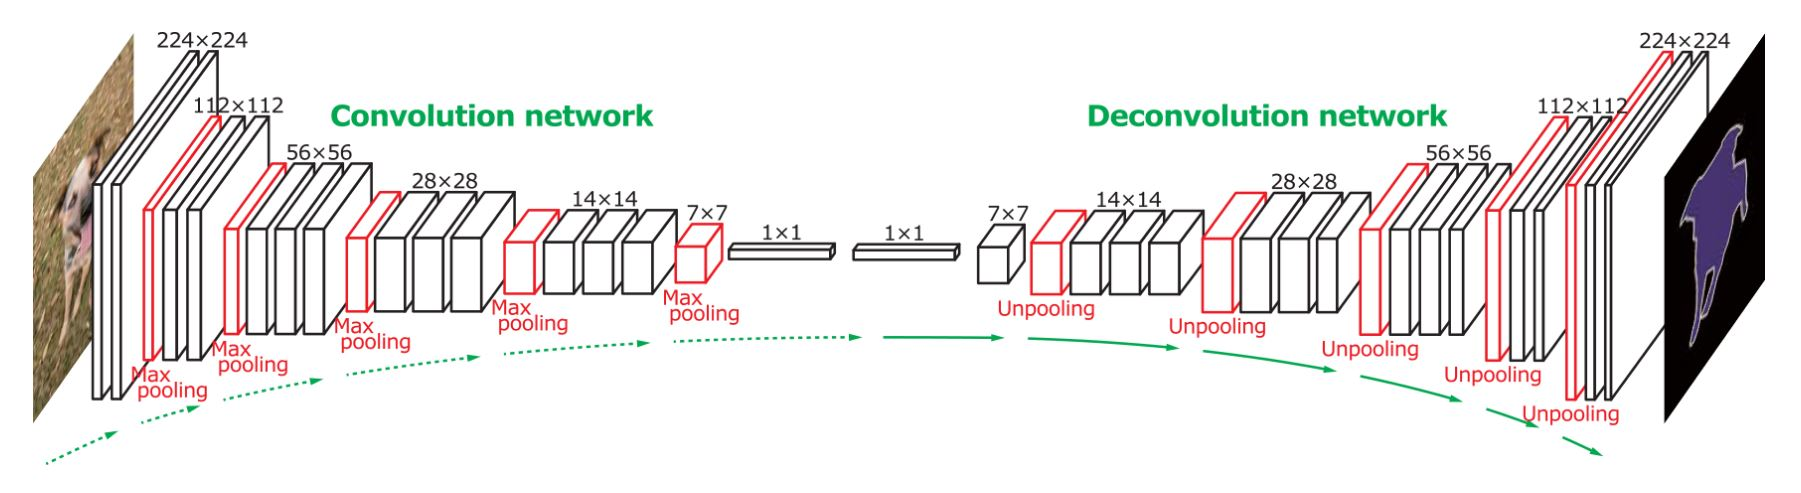

In [17]:
from IPython.display import Image
Image(filename=r"C:\Users\buckf\Documents\Practicum_2\Data\Notebook_Photos\Capture.JPG")

In [18]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    
    #Convolution 1:
    model.add(Conv2D(50, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))
    
    #Convolution 2:
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    
    model.add(MaxPooling2D(pool_size=(3,3)))
    
    model.add(ZeroPadding2D(padding=(1,1)))
    
    #Convolution 3
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    #Convolution 4
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    #Max-Pool 2
    model.add(MaxPooling2D(pool_size=(3,3)))
    
    
    model.add(Conv2DTranspose(1, kernel_size= (3,3), activation='relu', padding='same'))
    
    
    model.add(UpSampling2D(size=(3,3)))
    
    
    
    model.add(UpSampling2D(size=(3,3)))
    model.add(ZeroPadding2D(padding=(1,1)))
    
    
    
    
    model.compile(loss= keras.losses.mean_squared_error , optimizer= 'adam' , metrics=['accuracy'])
    return model
    
    
    
    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 101, 101, 50)      500       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 101, 101, 50)      22550     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 33, 33, 50)        0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 35, 35, 50)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 35, 35, 50)        22550     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 35, 35, 50)        22550     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 50)        0         
__________

In [19]:
preds = model.predict(X_val)

In [20]:
pred = preds[10]

In [21]:
pred.dtype

dtype('float32')

In [22]:
pred = pred.astype('uint8')

In [23]:
pred = np.multiply(pred, 255)
pred.max()

0

In [24]:
cv2.imshow('sample', pred)
cv2.waitKey(5000)

-1

In [25]:
cv2.destroyAllWindows()

## Actual Mask

In [26]:
actual = X_val[11]
actual = actual.astype('uint8')

In [27]:
actual = np.multiply(actual, 255)

In [28]:
actual.max()

255

In [29]:
cv2.imshow('sample', actual)
cv2.waitKey(5000)

-1

In [30]:
cv2.destroyAllWindows()

In [31]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    model.add(ZeroPadding2D(padding=(2,2), input_shape = (X_train.shape[1], X_train.shape[2], 1)))
    
    #Convolution 1:
    model.add(Conv2D(50, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same'))
    
    #Convolution 2:
    model.add(Conv2D(50, kernel_size= (2,2), activation='relu', padding='same'))
    
    
    model.add(MaxPooling2D(pool_size=(3,3)))
    
    
    
    #Convolution 3
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    #Convolution 4
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    #Max-Pool 2
    model.add(MaxPooling2D(pool_size=(3,3)))
    
    
    model.add(Conv2DTranspose(1, kernel_size= (3,3), activation='relu', padding='same'))
    
    
    model.add(UpSampling2D(size=(3,3)))
    
    
    
    model.add(UpSampling2D(size=(3,3)))
    model.add(ZeroPadding2D(padding=(1,1)))
    
    
    
    model.compile(loss= keras.losses.mean_squared_error, optimizer= 'adam' , metrics=['accuracy'])
    return model
    

model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_3 (ZeroPaddin (None, 105, 105, 1)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 105, 105, 50)      500       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 105, 105, 50)      10050     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 35, 35, 50)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 35, 35, 50)        22550     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 35, 35, 50)        22550     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 11, 11, 50)        0         
__________

KeyboardInterrupt: 

In [32]:
preds = model.predict(X_val)

In [33]:
y_val = y_val.astype('uint8')

In [34]:
y_val.dtype

dtype('uint8')

In [ ]:
preds = model.predict(X_val)

In [ ]:
bin_predictions = []
for pred_pix in np.nditer(preds):
    if pred_pix > 0.5:
        pred_pix = 1
        bin_predictions.append(pred_pix)
    else:
        pred_pix = 0
        bin_predictions.append(pred_pix)

In [ ]:
def iou_binary(preds, labels, EMPTY=1., ignore=None, per_image=True):
    """
    IoU for foreground class
    binary: 1 foreground, 0 background
    """
    if not per_image:
        preds, labels = (preds,), (labels,)
    ious = []
    for pred, label in zip(preds, labels):
        intersection = ((label == 1) & (pred == 1)).sum()
        union = ((label == 1) | ((pred == 1) & (label != ignore))).sum()
        if not union:
            iou = EMPTY
        else:
            iou = float(intersection) / union
        ious.append(iou)
    iou = mean(ious)    # mean accross images if per_image
    return 100 * iou


def mean(l, ignore_nan=False, empty=0):
    """
    nanmean compatible with generators.
    """
    l = iter(l)
    if ignore_nan:
        l = ifilterfalse(np.isnan, l)
    try:
        n = 1
        acc = next(l)
    except StopIteration:
        if empty == 'raise':
            raise ValueError('Empty mean')
        return empty
    for n, v in enumerate(l, 2):
        acc += v
    if n == 1:
        return acc
    return acc / n

In [ ]:
iou_binary(preds=bin_predictions, labels=y_val)

In [41]:
def iou_metric(y_true_in, y_pred_in, print_table=False):
    labels = y_true_in
    y_pred = y_pred_in


    true_objects = 2
    pred_objects = 2

    # Jiaxin fin that if all zeros, then, the background is treated as object
    temp1 = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=([0,0.5,1], [0,0.5, 1]))
#     temp1 = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))
    #print(temp1)
    intersection = temp1[0]
    #print("temp2 = ",temp1[1])
    #print(intersection.shape)
   # print(intersection)
    # Compute areas (needed for finding the union between all objects)
    #print(np.histogram(labels, bins = true_objects))
    area_true = np.histogram(labels,bins=[0,0.5,1])[0]
    #print("area_true = ",area_true)
    area_pred = np.histogram(y_pred, bins=[0,0.5,1])[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection
  
    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    intersection[intersection == 0] = 1e-9
    
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union

    # Precision helper function
    def precision_at(threshold, iou):
        matches = iou > threshold
        true_positives = np.sum(matches, axis=1) == 1   # Correct objects
        false_positives = np.sum(matches, axis=0) == 0  # Missed objects
        false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
        tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
        return tp, fp, fn

    # Loop over IoU thresholds
    prec = []
    if print_table:
        print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        if (tp + fp + fn) > 0:
            p = tp / (tp + fp + fn)
        else:
            p = 0
        if print_table:
            print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    
    if print_table:
        print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    return np.mean(prec)

def iou_metric_batch(y_true_in, y_pred_in):
    y_pred_in = y_pred_in > 0.5 # added by sgx 20180728
    batch_size = y_true_in.shape[0]
    metric = []
    for batch in range(batch_size):
        value = iou_metric(y_true_in[batch], y_pred_in[batch])
        metric.append(value)
    #print("metric = ",metric)
    return np.mean(metric)

def my_iou_metric(label, pred):
    metric_value = tf.py_func(iou_metric_batch, [label, pred], tf.float64)
    return metric_value

In [42]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    model.add(Conv2D(32, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same',
                     input_shape = (X_train.shape[1], X_train.shape[2], 1)))

    model.add(Conv2D(32, kernel_size = (3,3),
                     padding = 'same',
                     activation = 'relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    
    model.add(Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(2,2)))
    
    
    
    model.compile(loss= keras.losses.mean_squared_error, optimizer= 'adam' , metrics=[my_iou_metric])
    return model


    
model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# # build the model
# model = simple_cnn_model()

# # Fit the model

# t0 = time.time()
# log = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)
# t1 = time.time()
# print(t1-t0, " seconds")
# # Final evaluation of the model
# scores = model.evaluate(X_val, y_val, verbose=0)
# print("CNN Error: %.2f%%" % (100-scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 101, 101, 32)      320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 101, 101, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 101, 101, 1)       289       
Total params: 9,857
Trainable params: 9,857
Non-trainable params: 0
_________________________________________________________________
Train on 2000 samples, validate on 2000 samples
Epoch 1/20
2000/2000 [==============================] - 15s 7ms/step - loss: 0.1978 - my_iou

In [ ]:
num_pixels = X_train.shape[1] * X_train.shape[2]
num_classes = y_val.shape[1]

def simple_cnn_model():
    
    # create model
### YOUR TURN
# Build a model that has 1 convolution layer, 1 max pooling, 1 dense, and output 
# Use 32 filters with 5x5 size
# For max pooling layer, make the layer such that the featuremap size would be the half after the pooling layer
# hint: you need to change the argument input_shape to (w,h,1) in the first conv layer

    
    
    model = Sequential()
    model.add(ZeroPadding2D(padding=(2,2), input_shape = (X_train.shape[1], X_train.shape[2], 1)))
    
    #Convolution 1:
    model.add(Conv2D(200, kernel_size = (3,3),
                     activation = 'relu',
                     padding = 'same'))
    
    #Convolution 2:
    model.add(Conv2D(50, kernel_size= (2,2), activation='relu', padding='same'))
    
    
    model.add(MaxPooling2D(pool_size=(3,3)))
    
    
    
    #Convolution 3
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    #Convolution 4
    model.add(Conv2D(50, kernel_size= (3,3), activation='relu', padding='same'))
    
    #Max-Pool 2
    model.add(MaxPooling2D(pool_size=(3,3)))
    
    
    model.add(Conv2DTranspose(1, kernel_size= (3,3), activation='relu', padding='same'))
    
    
    model.add(UpSampling2D(size=(3,3)))
    
    
    
    model.add(UpSampling2D(size=(3,3)))
    model.add(ZeroPadding2D(padding=(1,1)))
    
    
    
    model.compile(loss= keras.losses.mean_squared_error, optimizer= 'adam' , metrics=[my_iou_metric])
    return model
    

model = simple_cnn_model()
model.summary()
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=15, verbose=1)